## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)
price      0
year       0
mileage    0
dtype: int64
k: 3 / SSE: 63019593071.77777
k: 10 / SSE: 55284822716.99
k: 25 / SSE: 51583519544.11839
k: 50 / SSE: 49878160789.4936
k: 100 / SSE: 49138071280.060295
k: 300 / SSE: 50238649457.106
[77]


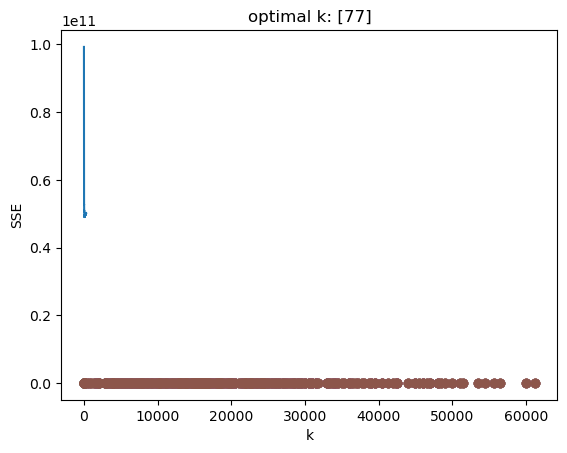

'\nThe optimal k is 77. For small k, the model is underfiting. The\nmodel is too sensitive to noise and specific data points, which\nleads to poor generationzation. For large k, the model is overfiting.\nIt averages over too many neighbors, losing the ability to make\nprecise predictions for individual test points.\n'

In [34]:
# load USA_cars_datasets.csv
import pandas as pd
df = pd.read_csv('data/USA_cars_datasets.csv')

# keep only the required columns
df = df[['price', 'year', 'mileage']]

# check for missing values
missing_values = df.isna().sum()

print(df.head())
print(df.shape)
print(missing_values) # there are no missing values

# normalize 'year' and 'mileage'
# I am using the built-in scaler from sklearn here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

# splitting the dataset
from sklearn.model_selection import train_test_split
X = df[['year', 'mileage']] # x contains the features year and mileage
y = df['price'] # y contains the target variable price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# training and predicting with kNN
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
for k in [3, 10, 25, 50, 100, 300]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    y_hat = model.predict(X_test)

    SSE = np.sum((y_test - y_hat) ** 2)

    plt.scatter(y_test, y_hat)
    plt.title('k: ' + str(k) + ', SSE: ' + str(SSE))

    print('k: ' + str(k) + ' / SSE: ' + str(SSE))

'''
For smaller k values, the scatterplot shows a larger spread between
actual and predicted values, indicating poor predictions for some
test points. As k increases the points cluster closer around the 
diagonal line. At very large k value, the predictions become very
flatten and smoothed over, lossing accuracy.
'''

# determine the optimal k
k_bar = 300
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train, y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum((y_test - y_hat) ** 2)

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0, k_bar), SSE)
plt.xlabel("k")
plt.title("optimal k: " + str(k_star))
plt.ylabel('SSE')
plt.show()

'''
The optimal k is 77. For small k, the model is underfiting. The
model is too sensitive to noise and specific data points, which
leads to poor generationzation. For large k, the model is overfiting.
It averages over too many neighbors, losing the ability to make
precise predictions for individual test points.
'''

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   animal    101 non-null    object
 1   hair      101 non-null    int64 
 2   feathers  101 non-null    int64 
 3   eggs      101 non-null    int64 
 4   milk      101 non-null    int64 
 5   airborne  101 non-null    int64 
 6   aquatic   101 non-null    int64 
 7   predator  101 non-null    int64 
 8   toothed   101 non-null    int64 
 9   backbone  101 non-null    int64 
 10  breathes  101 non-null    int64 
 11  venomous  101 non-null    int64 
 12  fins      101 non-null    int64 
 13  legs      101 non-null    int64 
 14  tail      101 non-null    int64 
 15  domestic  101 non-null    int64 
 16  catsize   101 non-null    int64 
 17  class     101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
0.9607843137254902
[1 2]


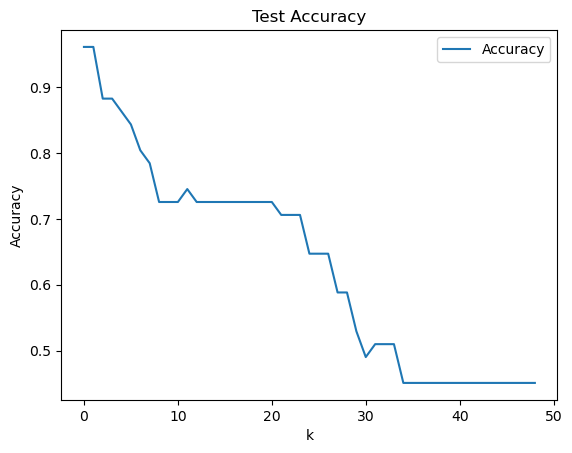

All variables, confusion table: class   1   2  3  4  5  6  7
row_0                       
1      23   0  0  0  0  0  0
2       0  12  0  0  0  0  0
3       0   0  1  0  0  0  0
4       0   0  1  3  0  0  0
5       0   0  1  0  3  0  0
6       0   0  0  0  0  5  0
7       0   0  0  0  0  0  2
0.7450980392156863
[2 4 5 6]


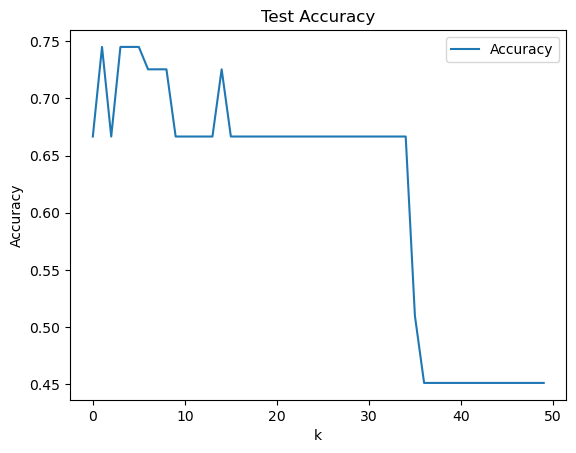

confusion table: class   1   2  3  4  5  6  7
row_0                       
1      23   0  0  0  0  0  0
2       0  12  2  0  0  5  0
4       0   0  1  3  3  0  2
[[0.  0.5 0.  0.  0.  0.5 0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.5]
 [0.  0.5 0.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.5]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.5 0. ]
 

'\nRelying on hard label predictions in classification can be risky\nbecause it throws away important info about minority classes.\nThese classes might not appear in the confusion matrix, but\nwhen using probabilistic predictions like predict_proba(), they\nstill have non-zero probabilities. For example, for a given \nobservation, predict_proba() might predict class 1 with 80% \nprobability and class 6 with 20% probability, even though the \nhard label prediction is class 1. Ignoring these probabilities \ncan cause model to overlook less frequent classes, leading to \nincomplete results.\n'

In [35]:
# load the zoo data
import pandas as pd
df = pd.read_csv('data/zoo.csv')

# inspect data
df.head(), df.info()

# check class distribution
class_distribute = df['class'].value_counts()

# summary stat for features
feature_variation = df.describe()

# display class distribution and variation in features
class_distribute, feature_variation

'''
The zoo dataset 41 animals in class 1, 20 in class 2, 5 in
class 3, 13 in class 4, 4 in class 5, 8 in class 6 and 10 in
class 7. Most animals have a backbone and breathe air.
'''

# split the data into training and test sets
from sklearn.model_selection import train_test_split
X = df.drop(['animal', 'class'], axis=1)
y = df['class']

# Split the data into 50% training and 50% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

# find the optimal k
from sklearn.neighbors import KNeighborsClassifier

N_train = len(y_train)
N_test = len(y_test)
k_bar = N_train-1
Acc = np.zeros(k_bar) 

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1) 
    fitted_model = model.fit(X_train.values,y_train) 
    y_hat = fitted_model.predict(X_test.values) 
    Acc[k] = np.sum( y_hat == y_test )/N_test 

Acc_max = np.max(Acc) 
max_index = np.where(Acc==Acc_max) 
if len(max_index) > 1:
    print(max_index[len(max_index)])
    max_index = max_index[len(max_index)]
k_star = max_index[0]+1 
print(Acc_max)
print(k_star)

# accuracy plot:
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy') 
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

# fit optimal model
model = KNeighborsClassifier(n_neighbors=k_star[0])
fitted_model = model.fit(X_train.values,y_train)
y_hat = fitted_model.predict(X_test.values) 

# confusion table
print('All variables, confusion table:', pd.crosstab(y_hat, y_test))

### use only `milk`, `aquatic`, and `airborne` to train a new kNN classifier
# select data
x_vars = ['milk','aquatic','airborne']
y = df['class']
X = df.loc[:,x_vars]

# split the sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=100)
N_train = len(y_train)
N_test = len(y_test)

# find the optimal k
k_bar = N_train 
Acc = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train.values,y_train) 
    y_hat = fitted_model.predict(X_test.values)
    Acc[k] = np.sum( y_hat == y_test )/N_test 

Acc_max = np.max(Acc) 
max_index = np.where(Acc==Acc_max)
if len(max_index) > 1:
    print(max_index[len(max_index)])
    max_index = max_index[len(max_index)]
k_star = max_index[0]+1 
print(Acc_max)
print(k_star)

# accuracy plot
plt.plot(np.arange(0,k_bar),Acc,label='Accuracy') 
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

# fit optimal model
model = KNeighborsClassifier(n_neighbors=k_star[0])
fitted_model = model.fit(X_train.values,y_train) 
y_hat = model.predict(X_test.values) 

# confusion Table:
print('confusion table:', pd.crosstab(y_hat, y_test))
print( model.predict_proba(X_test.values) )

'''
Relying on hard label predictions in classification can be risky
because it throws away important info about minority classes.
These classes might not appear in the confusion matrix, but
when using probabilistic predictions like predict_proba(), they
still have non-zero probabilities. For example, for a given 
observation, predict_proba() might predict class 1 with 80% 
probability and class 6 with 20% probability, even though the 
hard label prediction is class 1. Ignoring these probabilities 
can cause model to overlook less frequent classes, leading to 
incomplete results.
'''

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data. 

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data. 
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE. 
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.